In [32]:
import sys 

import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn
import random
import time

import warnings
warnings.filterwarnings('ignore')


In [33]:
data=pd.read_csv("train.csv")

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Torber, Mr. Ernst William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [36]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
 data['Age'].fillna(data['Age'].median(), inplace = True)

    #complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [39]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [40]:
data['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [41]:
data.loc[data.Cabin.isna(),'Cabin'] = "No Cabin"

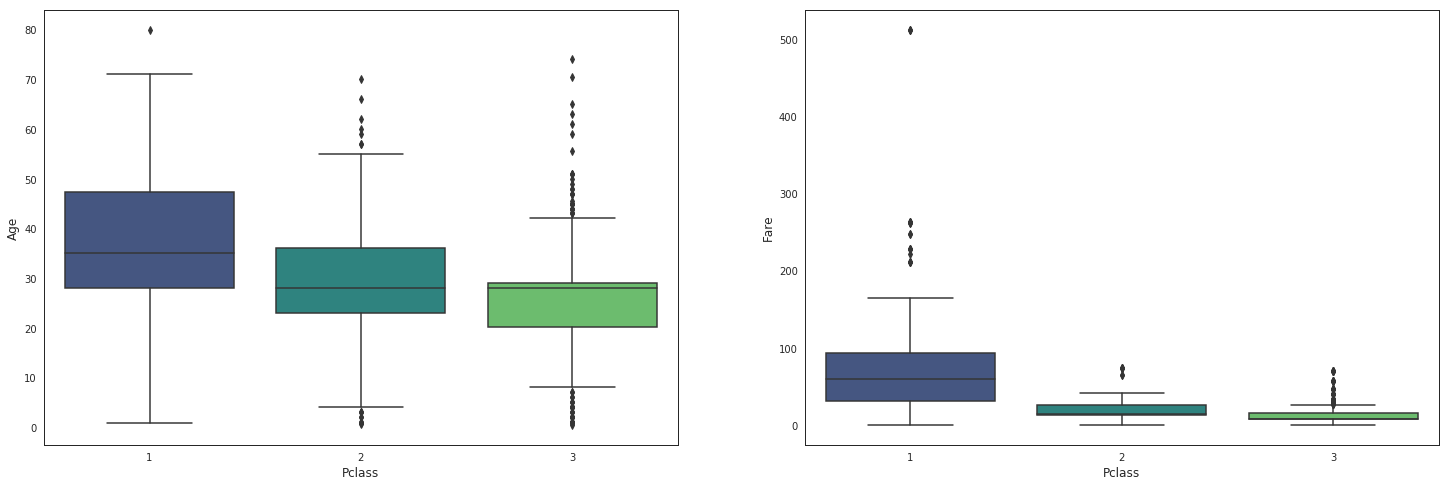

In [42]:
fig,axes = plt.subplots(1, 2,figsize=(25,8))
print(axes)

sns.boxplot(x='Pclass',y='Age',data=data, palette='viridis',ax=axes[0])

# We now need to check for outliers (values that seem irregular compared to the others)
sns.boxplot(x='Pclass',y='Fare',data=data, palette='viridis',ax=axes[1])

plt.show()

In [43]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


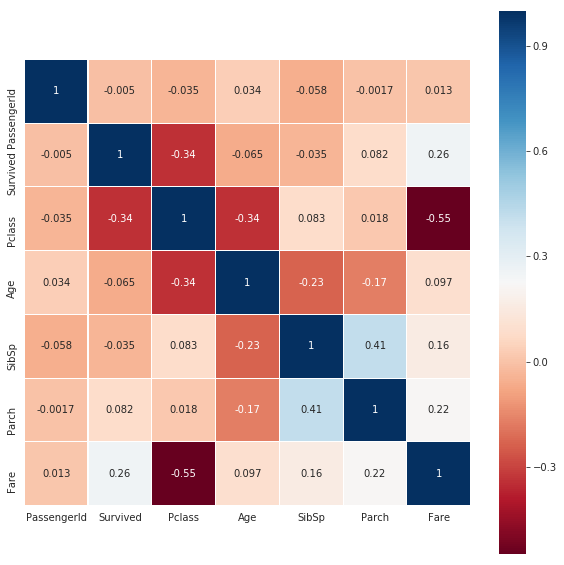

In [44]:
numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    data.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

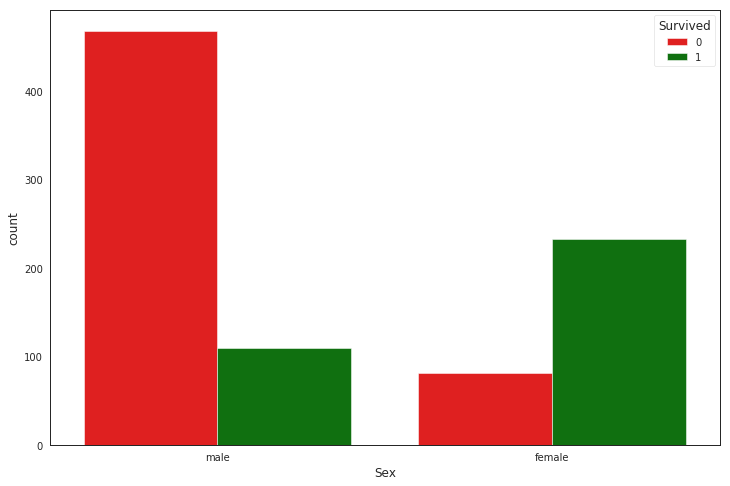

In [46]:
palette ={1:"g", 0:"r"}
sns.countplot(x='Sex',data=datasurvived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male'),hue="Survived", palette=palette)

In [47]:
def features_engineering(df):
    df.loc[df.Age.isna(), 'Age'] = df[~df.Age.isna()].Age.mean()
    df.loc[df.Cabin.isna(),'Cabin'] = "No Cabin"
    df.loc[df.Embarked.isna(),'Embarked'] = "S"
    df['persons_abroad_size'] = (df['Parch']+df['SibSp']).astype(int)
    df['alone'] = np.where(df['Parch']==0,1,0)
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    df['Sex'] = df['Sex'].map( {'male': 1, 'female': 2} ).astype(int)
    df['log_fare'] = df['Fare'].apply(np.log)
    df['Room'] = (df['Cabin']
                    .str.slice(1,5).str.extract('([0-9]+)', expand=False)
                    .fillna(0)
                    .astype(int))
    df['RoomBand'] = 0
    df.loc[(df.Room > 0) & (df.Room <= 20), 'RoomBand'] = 1
    df.loc[(df.Room > 20) & (df.Room <= 40), 'RoomBand'] = 2
    df.loc[(df.Room > 40) & (df.Room <= 80), 'RoomBand'] = 3
    df.loc[df.Room > 80, 'RoomBand'] = 4
    df_id = df.PassengerId
    df = df.drop('PassengerId', axis=1)
    return df,df_id

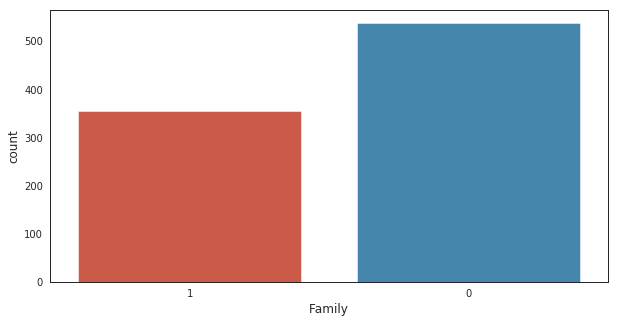

In [51]:
data['Family'] =  data["Parch"] + data["SibSp"]
data['Family'].loc[data['Family'] > 0] = 1
data['Family'].loc[data['Family'] == 0] = 0


# drop Parch & SibSp
#data = data.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1) = plt.subplots(1,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=data,kind='count',ax=axis1)
sns.countplot(x='Family', data=data, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
# family_perc = data[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
# sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

# axis1.set_xticklabels(["With Family","Alone"], rotation=0)

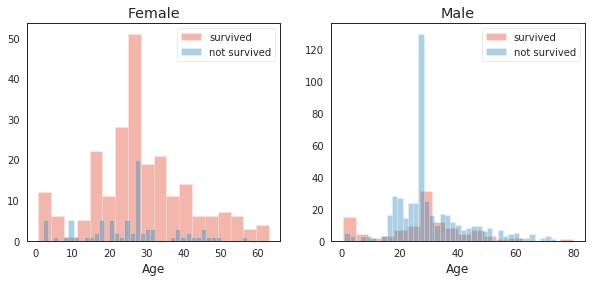

In [52]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

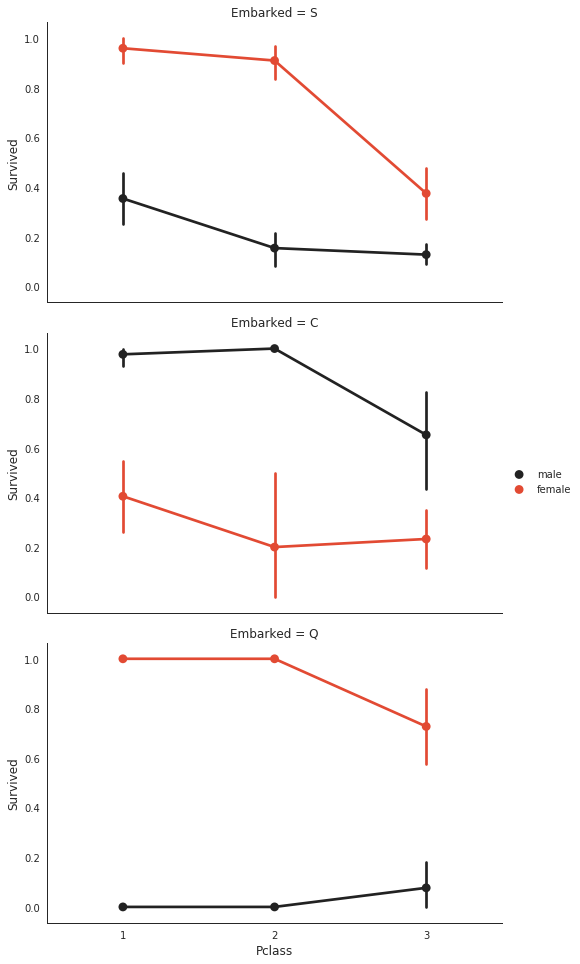

In [53]:
FacetGrid = sns.FacetGrid(data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()